In [192]:
import pandas as pd

from datetime import datetime

import matplotlib.pyplot as plt
import re
import seaborn as sns
import itertools
import collections

import networkx as nx
from nltk.corpus import stopwords
import os

! pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [193]:
df = pd.read_excel('Speeches combined1.xlsx')
df=df.dropna()

In [194]:
df['Date'] =  pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d')

df= df[df['Content'].notna()]
print(df)

         Date          Speaker                                          Title  \
0  2017-10-25        Elon Musk                     Making Life Multiplanetary   
1  2007-09-01       Steve Jobs                         Introducing the Iphone   
2  2021-10-28  Mark Zuckerberg  The Metaverse and how we'll build it together   

                                             Content  
0  I'm going to talk more about what it takes to ...  
1  This is the day I’ve been looking forward to f...  
2  Desktop to web to phones, from text to photos ...  


In [195]:
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords

stop_words = stopwords.words("english")

from nltk import bigrams


df['clean_text'] = df['Content'].apply(lambda x: ' '.join([item for item in x.split()
                                                                  if item not in stop_words]))
df['clean_text'] = df['clean_text'].str.replace('\d+', '')

C:\Users\c_sab\AppData\Local\Temp/ipykernel_12508/1880088210.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text'] = df['clean_text'].str.replace('\d+', '')


In [196]:
print(df['clean_text'])

0    I'm going talk takes become multi-planet speci...
1    This day I’ve looking forward two half years. ...
2    Desktop web phones, text photos video. But isn...
Name: clean_text, dtype: object


In [197]:
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

df_further_cleaning = [remove_url(text) for text in df['clean_text']]
df_further_cleaning[:1]

lower_case = [word.lower() for word in df['clean_text']]
sentences = df['clean_text']

df_further_cleaning[0].split()

words_in_df = [text.lower().split() for text in df_no_urls]
words_in_df[:2]

[['im',
  'going',
  'talk',
  'takes',
  'become',
  'multiplanet',
  'species',
  'and',
  'brief',
  'refresher',
  'important',
  'i',
  'think',
  'fundamentally',
  'future',
  'vastly',
  'exciting',
  'interesting',
  'were',
  'spacefaring',
  'civilization',
  'multiplanet',
  'species',
  'were',
  'not',
  'you',
  'want',
  'inspired',
  'things',
  'you',
  'want',
  'wake',
  'morning',
  'think',
  'the',
  'futures',
  'going',
  'great',
  'and',
  'thats',
  'spacefaring',
  'civilization',
  'about',
  'its',
  'believing',
  'future',
  'thinking',
  'future',
  'better',
  'past',
  'and',
  'i',
  'cant',
  'think',
  'anything',
  'exciting',
  'going',
  'among',
  'stars',
  'thats',
  'why',
  'so',
  'let',
  'go',
  'detail',
  'becoming',
  'multiplanet',
  'species',
  'this',
  'updated',
  'design',
  'well',
  'were',
  'sort',
  'searching',
  'right',
  'name',
  'code',
  'name',
  'least',
  'bfr',
  'probably',
  'important',
  'thing',
  'i',
  '

In [198]:
#We created a list with all the words used in the three speeches, combined, and we created a counter in order to find out which were the most used at a general level. 
all_words_further_cleaning = list(itertools.chain(*words_in_df))

counts_further_cleaning = collections.Counter(all_words_further_cleaning)

counts_further_cleaning.most_common(20)

[('and', 62),
 ('going', 61),
 ('so', 56),
 ('its', 47),
 ('i', 43),
 ('were', 41),
 ('got', 36),
 ('want', 33),
 ('it', 32),
 ('get', 32),
 ('right', 31),
 ('really', 31),
 ('the', 29),
 ('thats', 29),
 ('one', 27),
 ('like', 27),
 ('people', 27),
 ('now', 27),
 ('weve', 25),
 ('metaverse', 23)]

In [199]:
stop_words = stopwords.words('english')
stop_words.extend(["also","now","yet","thing","things","thats", "get", "good","the","im","weve","would","its","going","talk","takes","youre","got","want","like","well","metaverse","falcon","ipod","lets","take","theyre"])

#We wanted to eliminate the stop words from all the lists of words.
df_other_stop_words = [[word for word in df_words if not word in stop_words]
              for df_words in words_in_df]
df_other_stop_words[0]

['become',
 'multiplanet',
 'species',
 'brief',
 'refresher',
 'important',
 'think',
 'fundamentally',
 'future',
 'vastly',
 'exciting',
 'interesting',
 'spacefaring',
 'civilization',
 'multiplanet',
 'species',
 'inspired',
 'wake',
 'morning',
 'think',
 'futures',
 'great',
 'spacefaring',
 'civilization',
 'believing',
 'future',
 'thinking',
 'future',
 'better',
 'past',
 'cant',
 'think',
 'anything',
 'exciting',
 'among',
 'stars',
 'let',
 'go',
 'detail',
 'becoming',
 'multiplanet',
 'species',
 'updated',
 'design',
 'sort',
 'searching',
 'right',
 'name',
 'code',
 'name',
 'least',
 'bfr',
 'probably',
 'important',
 'convey',
 'presentation',
 'think',
 'figured',
 'pay',
 'important',
 'last',
 'years',
 'presentation',
 'really',
 'searching',
 'right',
 'way',
 'pay',
 'went',
 'various',
 'ideas',
 'kickstarter',
 'collecting',
 'underpants',
 'pan',
 'think',
 'way',
 'smaller',
 'vehicle',
 'still',
 'pretty',
 'big',
 'one',
 'everything',
 'needed',
 'grea

In [200]:
#After we obtained the list, we wanted to count its content, in order to have a better view of the most used words.
all_words_other_stop_words_nc = list(itertools.chain(*df_other_stop_words))

counts_other_stop_words_nc = collections.Counter(all_words_other_stop_words_nc)

counts_other_stop_words_nc.most_common(20)

[('right', 31),
 ('really', 31),
 ('one', 27),
 ('people', 27),
 ('see', 19),
 ('able', 19),
 ('think', 17),
 ('today', 16),
 ('home', 16),
 ('little', 15),
 ('engine', 15),
 ('use', 15),
 ('phone', 15),
 ('different', 15),
 ('experiences', 15),
 ('make', 14),
 ('first', 14),
 ('payload', 14),
 ('new', 13),
 ('landing', 13)]

In [201]:
#Next, we created a table with the list of words.
clean_df_other_stop_words = pd.DataFrame(counts_other_stop_words_nc.most_common(30),
                             columns=['words', 'repetition'])
clean_df_other_stop_words

,words,repetition
0,right,31
1,really,31
2,one,27
3,people,27
4,see,19
5,able,19
6,think,17
7,today,16
8,home,16
9,little,15


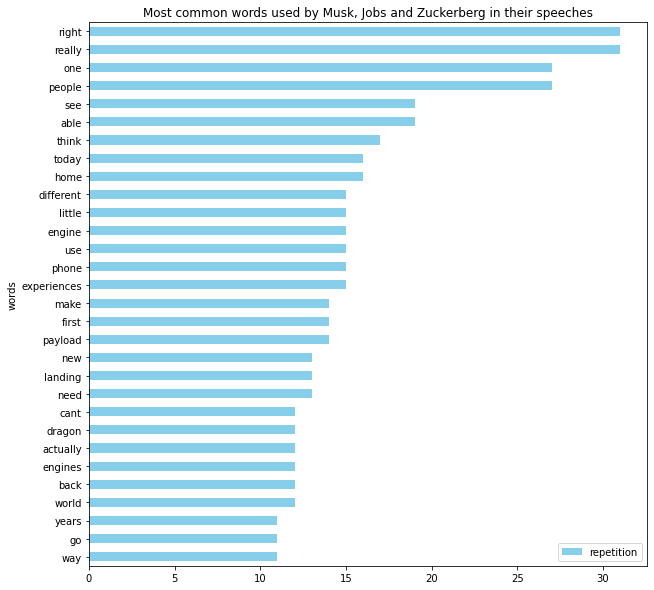

In [276]:
fig, ax = plt.subplots(figsize=(10, 10))

#We created a plot with horizontal lines
clean_df_other_stop_words.sort_values(by ='repetition').plot.barh(x='words',
                      y ='repetition',
                      ax=ax,
                      color="skyblue")

ax.set_title("Most common words used by Musk, Jobs and Zuckerberg in their speeches")

plt.show()

In [220]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

df = pd.read_excel('Speeches combined1.xlsx')
df=df.dropna()

df['year'] = pd.DatetimeIndex(df['Date']).year
df['Date'] =  pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d')

df= df[df['Content'].notna()]
print(df)

def sentimentScore(text):
    analyzer = SentimentIntensityAnalyzer()
    results = []
    for sentence in text:
        vs = analyzer.polarity_scores(sentence)
        results.append(vs)
    return results

         Date          Speaker                                          Title  \
0  2017-10-25        Elon Musk                     Making Life Multiplanetary   
1  2007-09-01       Steve Jobs                         Introducing the Iphone   
2  2021-10-28  Mark Zuckerberg  The Metaverse and how we'll build it together   

                                             Content  year  
0  I'm going to talk more about what it takes to ...  2017  
1  This is the day I’ve been looking forward to f...  2007  
2  Desktop to web to phones, from text to photos ...  2021  


In [221]:
df_results = pd.DataFrame(sentimentScore(df['Content']))

In [222]:
df=pd.merge(df, df_results, left_index=True, right_index=True)
df.set_index('Date', inplace=True)

In [223]:
df

,Speaker,Title,Content,year,neg,neu,pos,compound
Date,,,,,,,,
2017-10-25,Elon Musk,Making Life Multiplanetary,I'm going to talk more about what it takes to ...,2017,0.026,0.889,0.085,0.9995
2007-09-01,Steve Jobs,Introducing the Iphone,This is the day I’ve been looking forward to f...,2007,0.022,0.856,0.121,0.9998
2021-10-28,Mark Zuckerberg,The Metaverse and how we'll build it together,"Desktop to web to phones, from text to photos ...",2021,0.007,0.856,0.136,0.9998


In [256]:
df['polarity']=(df.pos-df.neg)/(df.pos+df.neg)
df
#"Neg","Neu","Pos" sum up to 1 and the scores show the proportion of text falling in the category. "Compound" ranges from -1 (the most negative) to 1 (the most positive).

,Speaker,Title,Content,year,neg,neu,pos,compound,polarity
Date,,,,,,,,,
2017-10-25,Elon Musk,Making Life Multiplanetary,I'm going to talk more about what it takes to ...,2017,0.026,0.889,0.085,0.9995,0.531532
2007-09-01,Steve Jobs,Introducing the Iphone,This is the day I’ve been looking forward to f...,2007,0.022,0.856,0.121,0.9998,0.692308
2021-10-28,Mark Zuckerberg,The Metaverse and how we'll build it together,"Desktop to web to phones, from text to photos ...",2021,0.007,0.856,0.136,0.9998,0.902098


In [257]:
df.info

<bound method DataFrame.info of                     Speaker                                          Title  \
Date                                                                         
2017-10-25        Elon Musk                     Making Life Multiplanetary   
2007-09-01       Steve Jobs                         Introducing the Iphone   
2021-10-28  Mark Zuckerberg  The Metaverse and how we'll build it together   

                                                      Content  year    neg  \
Date                                                                         
2017-10-25  I'm going to talk more about what it takes to ...  2017  0.026   
2007-09-01  This is the day I’ve been looking forward to f...  2007  0.022   
2021-10-28  Desktop to web to phones, from text to photos ...  2021  0.007   

              neu    pos  compound  polarity  
Date                                          
2017-10-25  0.889  0.085    0.9995  0.531532  
2007-09-01  0.856  0.121    0.9998  0.692308 

<AxesSubplot:xlabel='Speaker', ylabel='compound'>

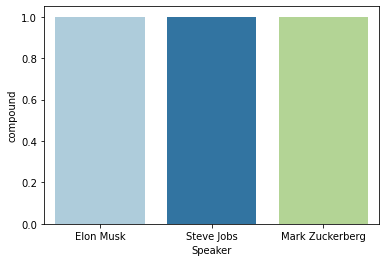

In [280]:
import seaborn as sns
sns.barplot(x='Speaker',y='compound',data=df, palette='Paired')

<AxesSubplot:xlabel='pos', ylabel='count'>

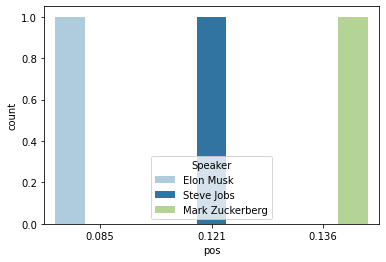

In [272]:
sns.countplot(x='pos', hue='Speaker',data=df, palette='Paired')

<AxesSubplot:xlabel='neu', ylabel='count'>

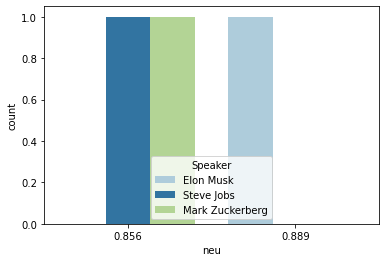

In [273]:
sns.countplot(x='neu', hue='Speaker',data=df, palette='Paired')

<AxesSubplot:xlabel='neg', ylabel='count'>

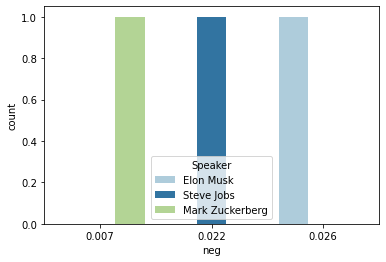

In [274]:
sns.countplot(x='neg', hue='Speaker',data=df, palette='Paired')